In [13]:

import re,string
import numpy as np
import pandas as pd 
# import fasttext
import spacy


import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer, pos_tag, word_tokenize

stop_words=stopwords.words('english')
lemmatizer = WordNetLemmatizer()

import gensim
from gensim.models import word2vec

from gensim.models.fasttext import FastText

import tensorflow as tf
from tensorflow.keras import backend

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm


from keras.layers import Activation, Embedding, Reshape,Concatenate
from keras.models import Sequential
from keras.preprocessing.sequence import skipgrams, make_sampling_table
from keras.preprocessing.text import Tokenizer

from typing import NamedTuple, List
from gensim.models import KeyedVectors
from nltk.tokenize import sent_tokenize


# import networkx as nx
from itertools import combinations
from collections import defaultdict  
import abc
from collections import Counter    
# nlp = spacy.load('en_core_web_sm')

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
pat_data=pd.read_excel('recent_5k.xlsx')

# pat_data=pd.read_excel('V:/ML_projects/Merckgroup/Projects/Keyword_tagging/data/Keyword_validation.xlsx')
data=pat_data['Abstract'][:1000]
data


# # remove special characters 
# def remove_special(x):
#     # new line at sentence end for training purposes
#     x = x.replace('.', '\n')
#     return re.sub('[^A-Za-z \n]+', ' ', x).lower()
    
# stop_words = stopwords.words('english')
# stopwords_dict = Counter(stop_words)
# def remove_stopwords(x):
#     return ' '.join([word for word in x.split() if word not in stopwords_dict])



# abstract = pat_data['Abstract'][~pat_data['Abstract'].isna()].apply(remove_stopwords).apply(remove_special).values
# title = pat_data['Title'][~pat_data['Title'].isna()].apply(remove_stopwords).apply(remove_special).values
# corpus = np.concatenate([title,abstract], axis=0)
# data = '\n'.join(corpus)
#### patbase cleaning
def text_cleaning(text):
    
    cleaned_txt = re.sub('<[^<]+>', ' ', str(text))
    cleaned_txt = re.sub( r'\[.*?\]', ' ',cleaned_txt)  #remove brackets
    cleaned_txt = re.sub('\d+', ' ', cleaned_txt)
    cleaned_txt = re.sub('\(\w+\)', ' ', cleaned_txt) 
  
#     cleaned_txt=cleaned_txt.translate(str.maketrans(' ', ' ',string.punctuation)) 
    return cleaned_txt
   
def stopword_removal(text):
    cleaned_txt = ' '.join([token for token in word_tokenize(text) if token not in stop_words])
    return cleaned_txt
def lemmatize_text(text):
    cleaned_txt=' '.join([lemmatizer.lemmatize(str(token)) for token in word_tokenize(text)])
    return cleaned_txt

def noun_adj_fetcher(cleaned_txt):
    Noun_adj=[w for w , pos in pos_tag(str(cleaned_txt).split()) if (pos == 'NN' or pos=='JJ' or pos=='JJR' or pos=='JJS' )]
    return Noun_adj

# python -m spacy download en_core_web_sm
def noun_adj_pairs(text):
    doc = nlp(str(text))
    noun_adj_pairs = []
    for i,token in enumerate(doc):
        if token.pos_ not in ('NOUN','PROPN'):
            continue
        for j in range(i+1,len(doc)):
            if doc[j].pos_ == 'ADJ':
                noun_adj_pairs.append((token,doc[j]))
                break
    return noun_adj_pairs

def preprocessed_text(df):
    
#     col=['nltk_tokens','nouns','lemmatize_text']
    preprocess_txt=pd.DataFrame()
    abs_clean_text=df.apply(text_cleaning)
    preprocess_txt['lemmatize_text']=abs_clean_text.apply(stopword_removal)         
#     preprocess_txt['lemmatize_text']=stopword_removed_text.apply(lemmatize_text)
  
#     for ind,text in preprocess_txt['lemmatize_text'].iteritems():       
#         tokens=word_tokenize(text)
#         pos_tokens=nltk.pos_tag(tokens)
# #         preprocess_txt.at[ind,'nouns']=[pos_token for pos_token,pos in pos_tokens if pos.startswith('N')]
# #         preprocess_txt.at[ind,'nltk_tokens']=tokens     
    return preprocess_txt

In [15]:

data=data.apply(text_cleaning).tolist()


In [60]:
# preprocessed_df1=preprocessed_text(data)
# data1=preprocessed_df1[lemmatize_text].tolist()
# from sklearn.datasets import fetch_20newsgroups
# data = fetch_20newsgroups(subset='all')['data']
# data=data
# !pip install hdbscan

In [29]:
# from sklearn.datasets import fetch_20newsgroups
# data = fetch_20newsgroups(subset='all')['data']

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

In [6]:
import umap.umap_ as umap
import joblib
import pickle 

umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)


In [7]:

joblib.dump(umap_embeddings, filename)

umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(loaded_reducer)
file1 = 'umap_bert_embedd.sav'
joblib.dump(umap_data, file1)
# umap_data= joblib.load(file1)

['umap_bert_embedd.sav']

In [3]:
import joblib
import pickle
filename = 'umap_bert_trans.sav'
loaded_reducer = joblib.load(filename)
file1 = 'umap_bert_embedd.sav'
umap_data= joblib.load(file1)

In [4]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(loaded_reducer)


In [5]:
with open('km.pickle', 'wb') as f:
    pickle.dump(cluster, f)
with open('km.pickle', 'rb') as f:
    cluster = pickle.load(f)

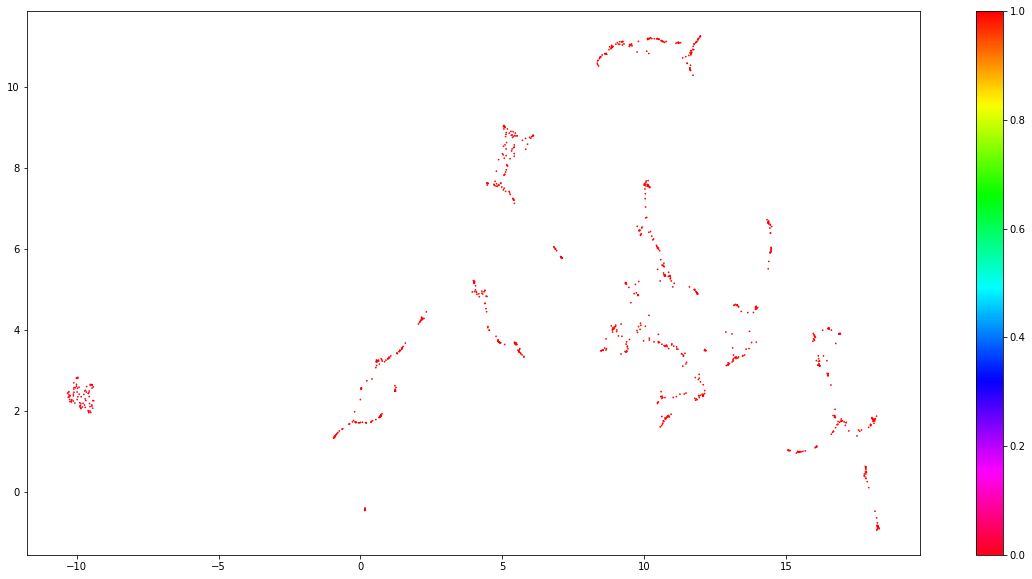

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# Prepare data


result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.5, cmap='hsv_r')
plt.colorbar()

In [16]:
data
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_df
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [17]:

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [18]:

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
1,1,918
0,0,82


In [19]:
top_n_words[1][:100]

[('cell', 0.0031836577097409196),
 ('results', 0.00318082568320134),
 ('using', 0.003175765784505564),
 ('cancer', 0.0031707223988508356),
 ('cells', 0.003167303588773685),
 ('clinical', 0.0031579769283830565),
 ('expression', 0.003147887075495469),
 ('used', 0.0031391644260349754),
 ('analysis', 0.0031391644260349754),
 ('associated', 0.0031167680160237793),
 ('high', 0.0031109032870064368),
 ('data', 0.0031088892340444285),
 ('showed', 0.0030961767446155094),
 ('based', 0.0030961767446155094),
 ('treatment', 0.00307536659057156),
 ('significantly', 0.0030568674721175994),
 ('studies', 0.0030429165044281647),
 ('risk', 0.003034153510317231),
 ('group', 0.0030311663620663496),
 ('increased', 0.00302814592695717)]

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,1000


In [22]:
topic_sizes

,Topic,Size
0,-1,1000


In [1]:
!wget https://huggingface.co/cross-encoder/ms-marco-MiniLM-L-12-v2/blob/main/tokenizer_config.json

--2022-04-20 13:14:40--  https://huggingface.co/cross-encoder/ms-marco-MiniLM-L-12-v2/blob/main/tokenizer_config.json
Resolving huggingface.co (huggingface.co)... 2600:1f18:147f:e800:a302:ad0e:3722:dcfb, 2600:1f18:147f:e850:6c0d:9a67:3e5:c11, 2600:1f18:147f:e850:4e87:e217:2e92:4bdd, ...
Connecting to huggingface.co (huggingface.co)|2600:1f18:147f:e800:a302:ad0e:3722:dcfb|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49116 (48K) [text/html]
Saving to: 'tokenizer_config.json'

     0K .......... .......... .......... .......... .......   100% 96.6K=0.5s

2022-04-20 13:14:42 (96.6 KB/s) - 'tokenizer_config.json' saved [49116/49116]

